In [1]:
from qiskit.result import Result, marginal_counts
import analysis_helper as helper
import numpy as np

# cmjtqh6tv5jg008enck0

In [2]:
job_id = 'cmjtqh6tv5jg008enck0'
attack_qubit_indices = (0, 1, 2, 4, 6)
delays = [160, 320, 640, 1280, 2560, 5120]
shots = 8000

In [3]:
result = helper.get_results_from_zip(job_id)

In [4]:
counts = result.get_counts()

In [5]:
m1counts = [helper.get_1_mcounts_per_qubit(qubit_index, counts) for qubit_index in range(len(attack_qubit_indices))]

In [6]:
def split_per_experiment(mcounts):
    n = len(delays)
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = [mcounts[i: (i+n)] for i in range(0, len(mcounts), n)]
    return blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x

In [7]:
diff_percent_xs = []
diff_percent_zs = []

for qubit_index, qubit in enumerate(attack_qubit_indices):
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = split_per_experiment(m1counts[qubit_index])
    blank_percent_z = np.array(blank_victim_circ_z) / shots * 100
    blank_percent_x = np.array(blank_victim_circ_x) / shots * 100
    victim_qc_cnot_z = np.array(victim_qc_with_cnot_z) / shots * 100
    victim_qc_cnot_x = np.array(victim_qc_with_cnot_x) / shots * 100
    diff_percent_x = victim_qc_cnot_x - blank_percent_x
    diff_percent_z = victim_qc_cnot_z - blank_percent_z
    diff_percent_xs.append(diff_percent_x)
    diff_percent_zs.append(diff_percent_z)

# test

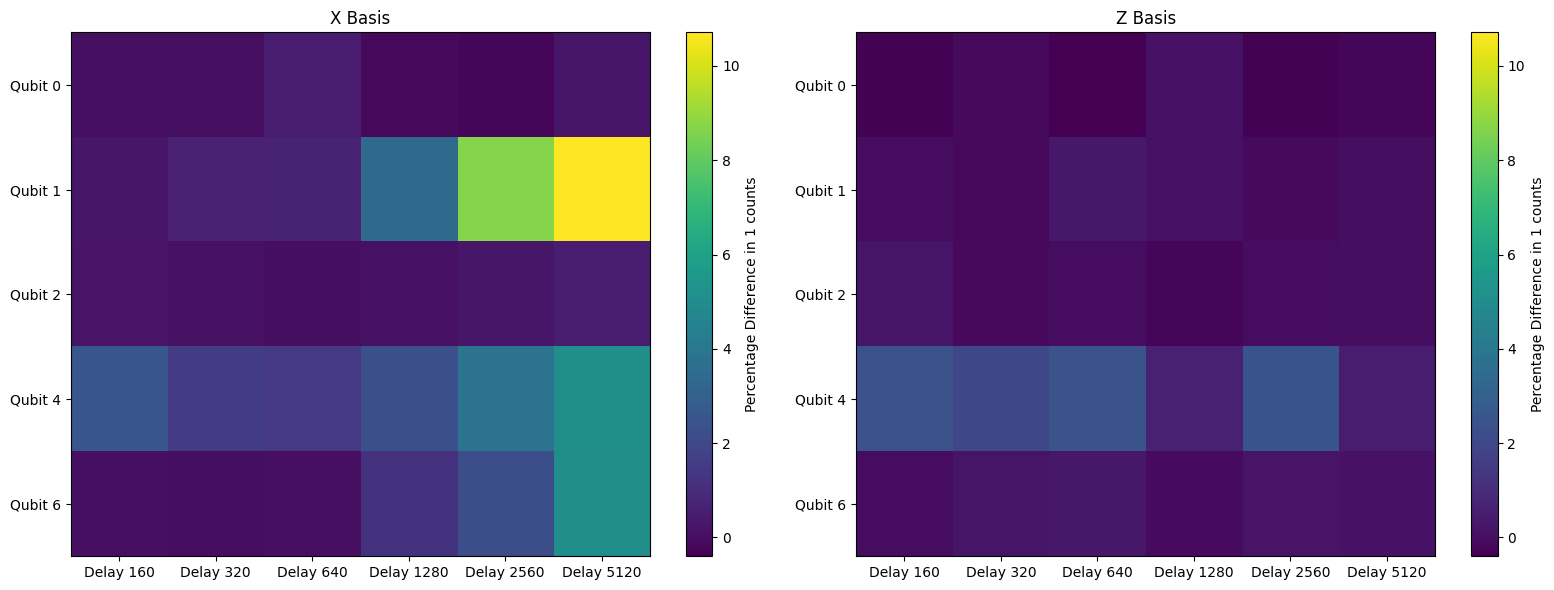

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace this with your actual data
qubits = ['Qubit {}'.format(i) for i in attack_qubit_indices]
experiments = ['Delay {}'.format(i) for i in delays]

# Generate random data for each experiment
data1 = np.array(diff_percent_xs)
data2 = np.array(diff_percent_zs)

# Calculate the common data range for both heatmaps
data_min = min(data1.min(), data2.min())
data_max = max(data1.max(), data2.max())

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first heatmap on the left subplot (ax[0])
heatmap1 = ax[0].imshow(data1, cmap='viridis', aspect='auto', vmin=data_min, vmax=data_max)
ax[0].set_title('X Basis')
ax[0].set_xticks(np.arange(len(experiments)))
ax[0].set_yticks(np.arange(len(qubits)))
ax[0].set_xticklabels(experiments)
ax[0].set_yticklabels(qubits)

# Plot the second heatmap on the right subplot (ax[1])
heatmap2 = ax[1].imshow(data2, cmap='viridis', aspect='auto', vmin=data_min, vmax=data_max)
ax[1].set_title('Z Basis')
ax[1].set_xticks(np.arange(len(experiments)))
ax[1].set_yticks(np.arange(len(qubits)))
ax[1].set_xticklabels(experiments)
ax[1].set_yticklabels(qubits)

# Add colorbars to both heatmaps
cbar1 = fig.colorbar(heatmap1, ax=ax[0])
cbar2 = fig.colorbar(heatmap2, ax=ax[1])

# Set labels for the colorbars
cbar1.set_label('Percentage Difference in 1 counts')
cbar2.set_label('Percentage Difference in 1 counts')

# Adjust the layout to prevent clipping of the labels
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
data1

array([[ 0.0625,  0.0625,  0.45  , -0.15  , -0.2125,  0.225 ],
       [ 0.2625,  0.6125,  0.725 ,  3.45  ,  8.7125, 10.7125],
       [ 0.175 ,  0.0875,  0.025 ,  0.0875,  0.2625,  0.475 ],
       [ 2.5875,  1.5125,  1.4375,  2.3125,  3.8125,  5.125 ],
       [ 0.0625,  0.    ,  0.0625,  1.2125,  2.25  ,  5.1125]])

In [10]:
data2

array([[-0.325 , -0.1125, -0.4   ,  0.1625, -0.325 , -0.2375],
       [-0.0125, -0.175 ,  0.3125,  0.1   , -0.1375,  0.025 ],
       [ 0.2125, -0.1   , -0.0375, -0.2125, -0.0375,  0.0125],
       [ 2.35  ,  2.025 ,  2.425 ,  0.625 ,  2.475 ,  0.4625],
       [-0.0125,  0.225 ,  0.3375, -0.0875,  0.175 ,  0.125 ]])

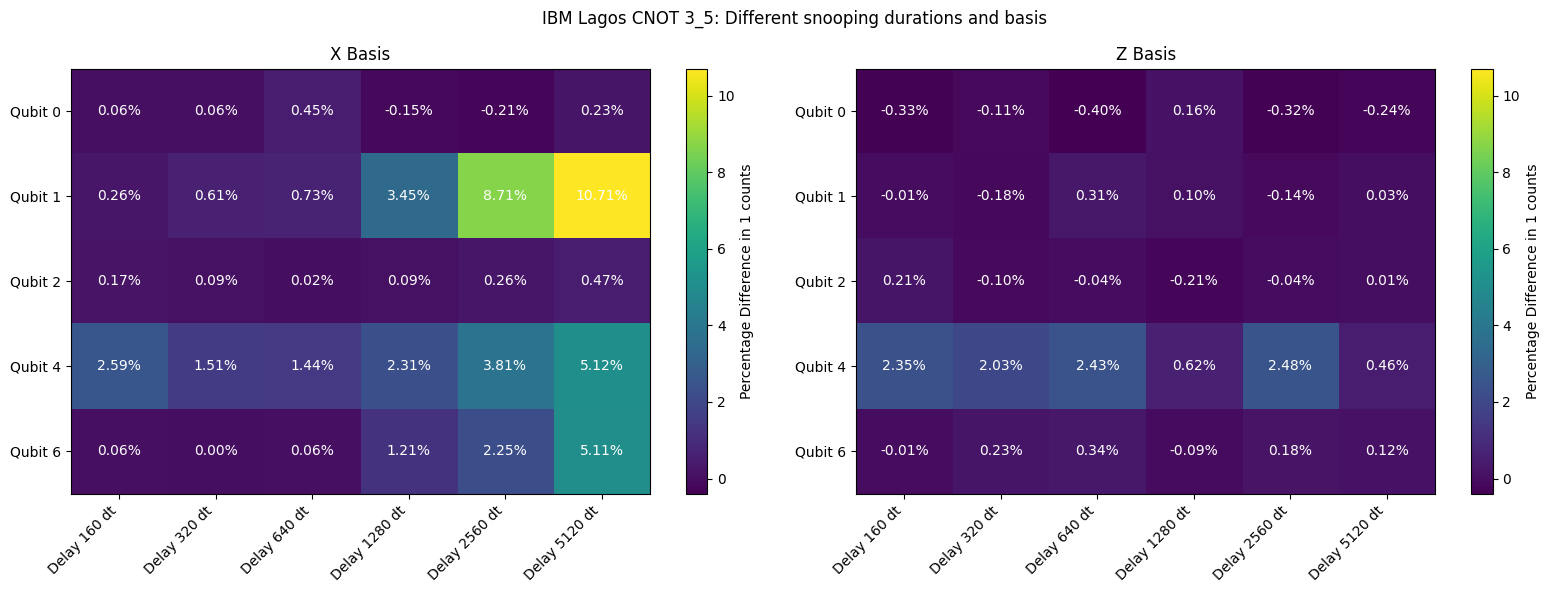

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace this with your actual data
qubits = ['Qubit {}'.format(i) for i in attack_qubit_indices]
experiments = ['Delay {} dt'.format(i) for i in delays]

# Generate random data for each experiment
data1 = np.array(diff_percent_xs)
data2 = np.array(diff_percent_zs)

# Calculate the common data range for both heatmaps
data_min = min(data1.min(), data2.min())
data_max = max(data1.max(), data2.max())

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
fig.suptitle('IBM Lagos CNOT 3_5: Different snooping durations and basis')

# Determine a common scale for both heatmaps
common_vmin = min(data_min, data2.min())
common_vmax = max(data_max, data2.max())

# Plot the first heatmap on the left subplot (ax[0])
heatmap1 = ax[0].imshow(data1, cmap='viridis', aspect='auto', vmin=common_vmin, vmax=common_vmax)
ax[0].set_title('X Basis')
ax[0].set_xticks(np.arange(len(experiments)))
ax[0].set_yticks(np.arange(len(qubits)))
ax[0].set_xticklabels(experiments, rotation=45, ha='right')
ax[0].set_yticklabels(qubits)

# Display percentage values inside the boxes
for i in range(len(qubits)):
    for j in range(len(experiments)):
        ax[0].text(j, i, f'{data1[i, j]:.2f}%', ha='center', va='center', color='w')

# Plot the second heatmap on the right subplot (ax[1])
heatmap2 = ax[1].imshow(data2, cmap='viridis', aspect='auto', vmin=common_vmin, vmax=common_vmax)
ax[1].set_title('Z Basis')
ax[1].set_xticks(np.arange(len(experiments)))
ax[1].set_yticks(np.arange(len(qubits)))
ax[1].set_xticklabels(experiments, rotation=45, ha='right')
ax[1].set_yticklabels(qubits)

# Display percentage values inside the boxes
for i in range(len(qubits)):
    for j in range(len(experiments)):
        ax[1].text(j, i, f'{data2[i, j]:.2f}%', ha='center', va='center', color='w')

# Add colorbars to both heatmaps
cbar1 = fig.colorbar(heatmap1, ax=ax[0])
cbar2 = fig.colorbar(heatmap2, ax=ax[1])

# Set labels for the colorbars
cbar1.set_label('Percentage Difference in 1 counts')
cbar2.set_label('Percentage Difference in 1 counts')

# Adjust the layout to prevent clipping of the labels
plt.tight_layout()

# Show the plot
plt.show()
